# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [2]:
#!pip install "numpy<2"

In [3]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
import skimage

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

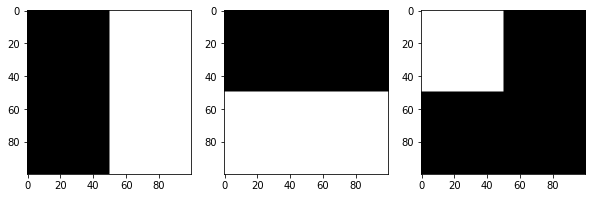

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


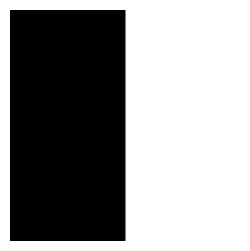

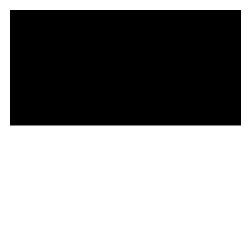

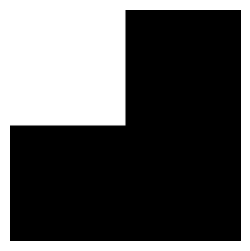

In [4]:
# solution
# First image: left half black, right half white
img1 = np.zeros((100, 100), dtype=np.uint8)
img1[:, 50:] = 255

# Second image: top half black, bottom half white
img2 = np.zeros((100, 100), dtype=np.uint8)
img2[50:, :] = 255

# Third image: top-left quarter white, rest black
img3 = np.zeros((100, 100), dtype=np.uint8)
img3[:50, :50] = 255

# Plot the images
plt.figure(figsize=(3, 3))
plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(3, 3))
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(3, 3))
plt.imshow(img3, cmap='gray')
plt.axis('off')
plt.show()

*   Use the above three images to create the following image

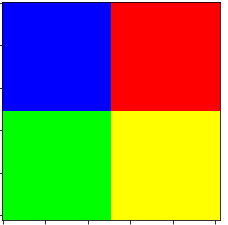
*Hint: Remember channels and color spaces*

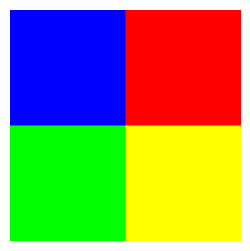

In [5]:
# solution
# Create an empty RGB image
color_img = np.zeros((100, 100, 3), dtype=np.uint8)

# img1: right half white (red channel)
color_img[..., 0] = img1

# img2: bottom half white (green channel)
color_img[..., 1] = img2

# img3: top-left quarter white (blue channel)
color_img[..., 2] = img3

plt.figure(figsize=(3, 3))
plt.imshow(color_img)
plt.axis('off')
plt.show()


### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

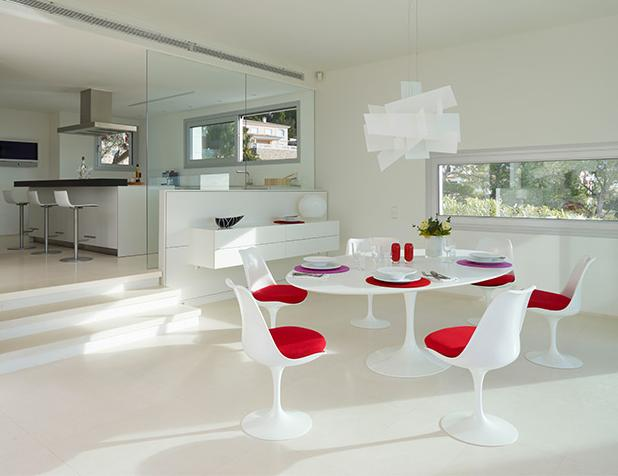

*   Extract individual channels and plot them using matplotlib subplot.



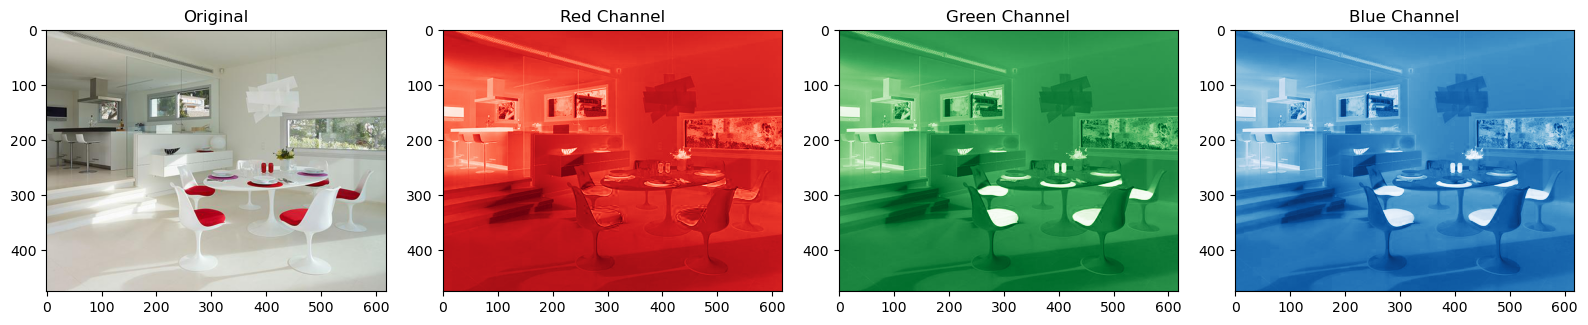

In [6]:
# solution
from PIL import Image

#Load the image
sillas= Image.open('images/sillas.jpg')
sillas_np = np.array(sillas)

#Extract channels
red_channel = sillas_np[..., 0]
green_channel = sillas_np[..., 1]
blue_channel = sillas_np[..., 2]

# Plot original and channels
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
axs[0].imshow(sillas_np)
axs[0].set_title('Original')
axs[1].imshow(red_channel, cmap='Reds')
axs[1].set_title('Red Channel')
axs[2].imshow(green_channel, cmap='Greens')
axs[2].set_title('Green Channel')
axs[3].imshow(blue_channel, cmap='Blues')
axs[3].set_title('Blue Channel')
plt.tight_layout()
plt.show()


*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

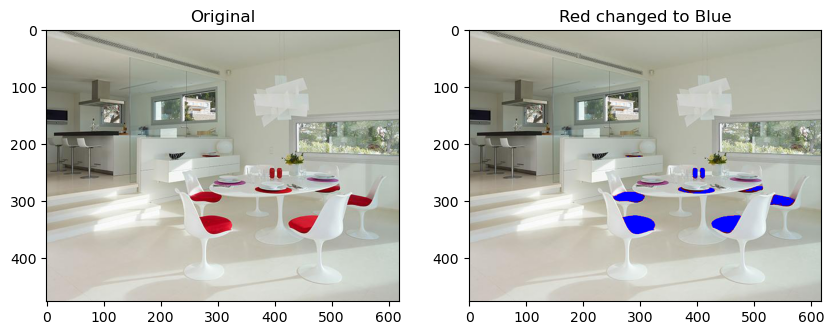

In [7]:
# solution
# Red must be dominant and above a threshold
red = sillas_np[..., 0]
green = sillas_np[..., 1]
blue = sillas_np[..., 2]

# Red is dominant and strong, green and blue are low
red_mask = (red > 120) & (red > green + 40) & (red > blue + 40) & (green < 100) & (blue < 100)

sillas_blue = sillas_np.copy()
sillas_blue[red_mask] = [0, 0, 255]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(sillas_np)
axs[0].set_title('Original')
axs[1].imshow(sillas_blue)
axs[1].set_title("Red changed to Blue")
plt.show()



# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

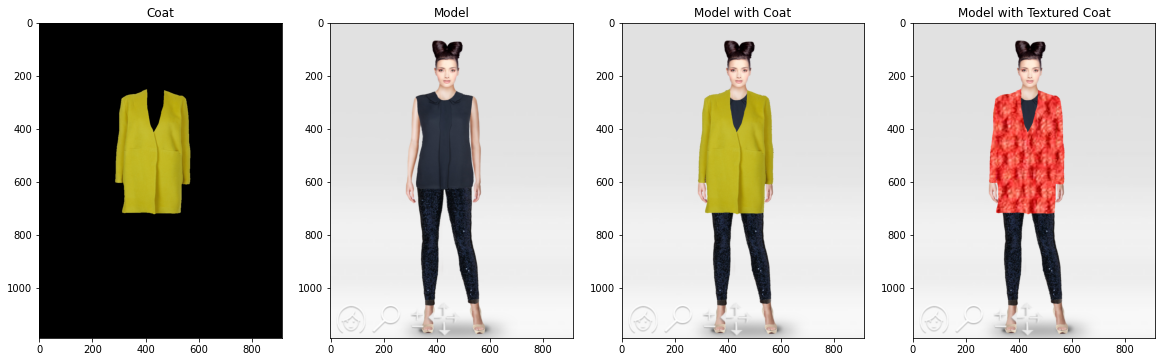

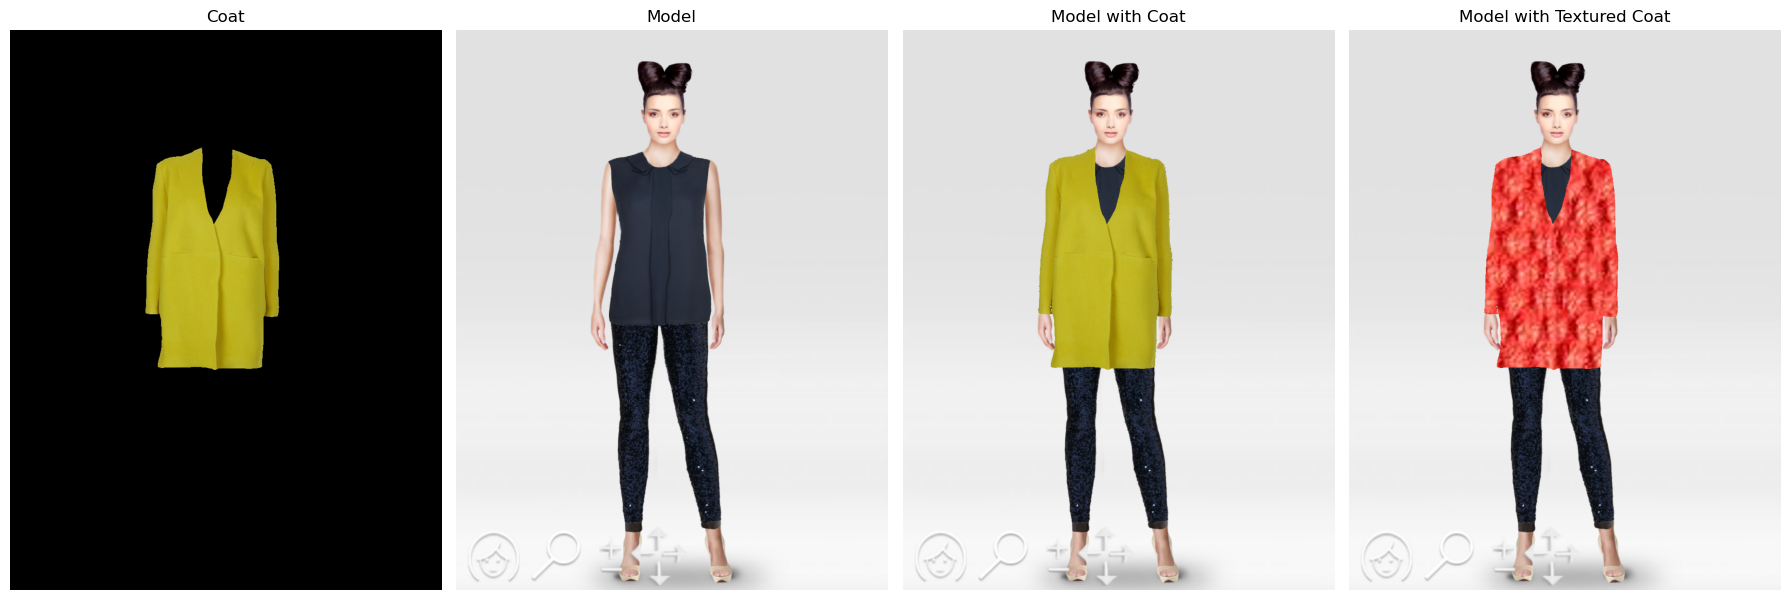

In [137]:
# solution
# Load images
model_img = Image.open('images/model.png').convert('RGBA')
coat_img = Image.open('images/coat.png').convert('RGBA')
coat_np = np.array(coat_img)

# Create mask for the coat
mask = ((coat_np[..., 0] > 0) &(coat_np[..., 1] > 0) &(coat_np[..., 2] > 0))
mask_img = Image.fromarray((mask * 255).astype(np.uint8), mode="L")

# Model with coat
model_with_coat_img = model_img.copy()
model_with_coat_img.paste(coat_img, mask_img)

# Model with textured coat
texture_img = Image.open('images/texture2.png').convert('RGBA')
model_with_texture_img = model_img.copy()
model_with_texture_img.paste(texture_img, mask_img)

# Plot
fig, axs = plt.subplots(1, 4, figsize=(18, 6))
axs[0].imshow(coat_img)
axs[0].set_title('Coat')

axs[1].imshow(model_img)
axs[1].set_title('Model')

axs[2].imshow(model_with_coat_img)
axs[2].set_title('Model with Coat')

axs[3].imshow(model_with_texture_img)
axs[3].set_title('Model with Textured Coat')

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()

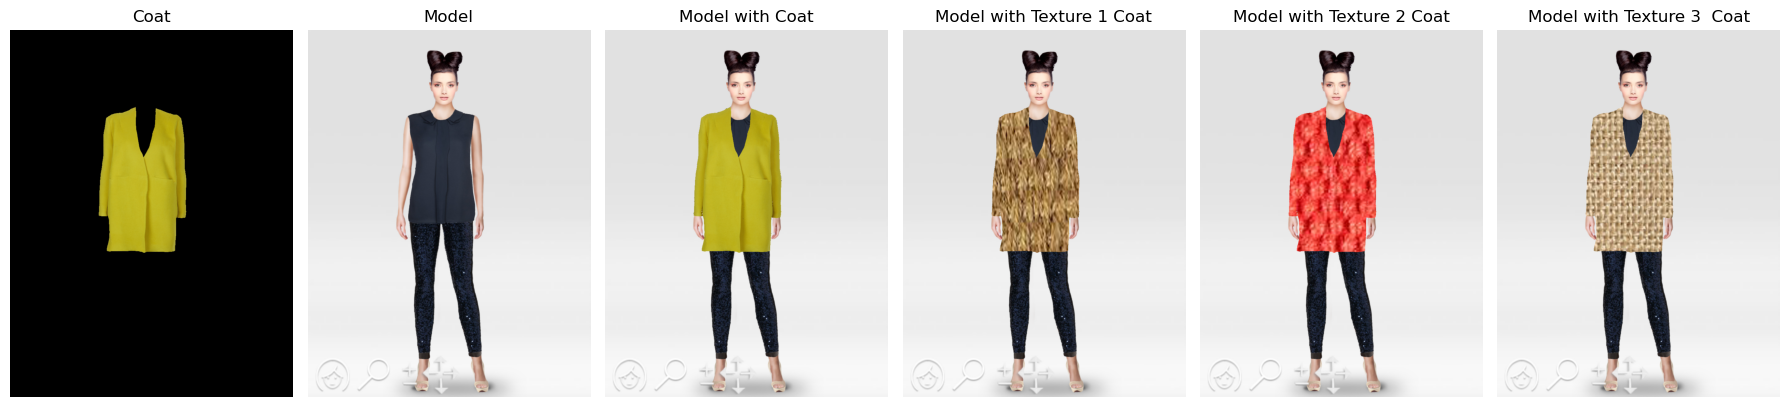

In [144]:
# solution
# Load images
model_img = Image.open('images/model.png').convert('RGBA')
coat_img = Image.open('images/coat.png').convert('RGBA')
coat_np = np.array(coat_img)

# Create mask for the coat
mask = ((coat_np[..., 0] > 0) &(coat_np[..., 1] > 0) &(coat_np[..., 2] > 0))
mask_img = Image.fromarray((mask * 255).astype(np.uint8), mode="L")

# Model with coat
model_with_coat_img = model_img.copy()
model_with_coat_img.paste(coat_img, mask_img)

# Model with textured coat
texture1_img = Image.open('images/texture.png').convert('RGBA')
texture2_img = Image.open('images/texture2.png').convert('RGBA')
texture3_img = Image.open('images/texture3.jpg').convert('RGBA')
# Resize texture to match model/coat size
texture1_img = texture1_img.resize(model_img.size)
texture3_img = texture3_img.resize(model_img.size)

model_with_texture1_img = model_img.copy()
model_with_texture2_img = model_img.copy()
model_with_texture3_img = model_img.copy()
model_with_texture1_img.paste(texture1_img, mask_img)
model_with_texture2_img.paste(texture2_img, mask_img)
model_with_texture3_img.paste(texture3_img, mask_img)


# Plot
fig, axs = plt.subplots(1, 6, figsize=(18, 6))
axs[0].imshow(coat_img)
axs[0].set_title('Coat')

axs[1].imshow(model_img)
axs[1].set_title('Model')

axs[2].imshow(model_with_coat_img)
axs[2].set_title('Model with Coat')

axs[3].imshow(model_with_texture1_img)
axs[3].set_title('Model with Texture 1 Coat')

axs[4].imshow(model_with_texture2_img)
axs[4].set_title('Model with Texture 2 Coat')

axs[5].imshow(model_with_texture3_img)
axs[5].set_title('Model with Texture 3  Coat')

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




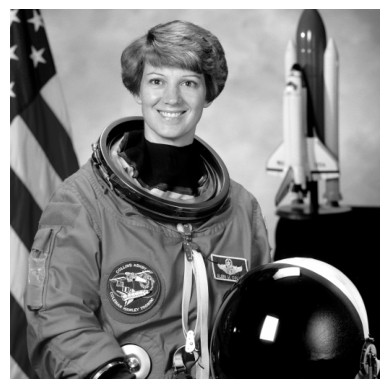

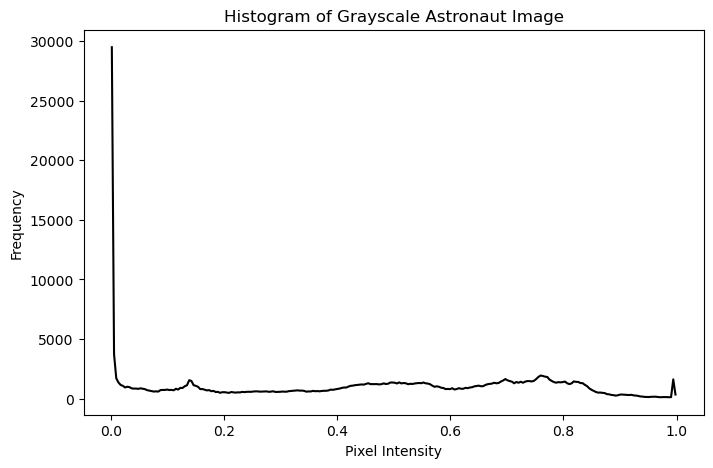

In [107]:
# solution
from skimage import data, color, exposure


# Load the astronaut image
image = data.astronaut()

# Convert to grayscale
gray_image = color.rgb2gray(image)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()


# Compute the histogram
hist, bin_edges = exposure.histogram(gray_image)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.plot(bin_edges, hist, color='black')
plt.title("Histogram of Grayscale Astronaut Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

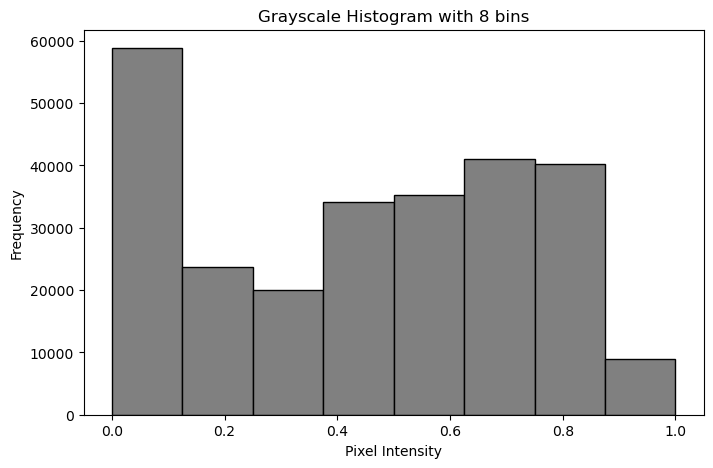

In [109]:
# solution
# Compute histogram with 8 bins
hist, bin_edges = np.histogram(gray_image, bins=8)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.figure(figsize=(8,5))
plt.bar(bin_centers, hist, color='gray',edgecolor='black', width=0.125)
plt.title("Grayscale Histogram with 8 bins")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()





*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

When I change the bin count, the histogram changes. Fewer bins make it blocky and hide details, while more bins show more detail but can be noisy. My inference does change because the shape of the histogram can look very different. I did not define a single correct bin count; I usually try different values and pick one that shows the main features clearly.

If the bin count is very low, the histogram oversimplifies the data and hides important features. If the bin count is very high, the histogram becomes noisy and hard to interpret.


...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


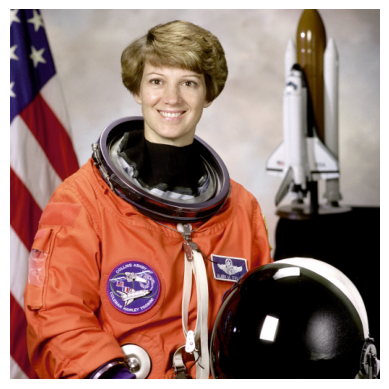

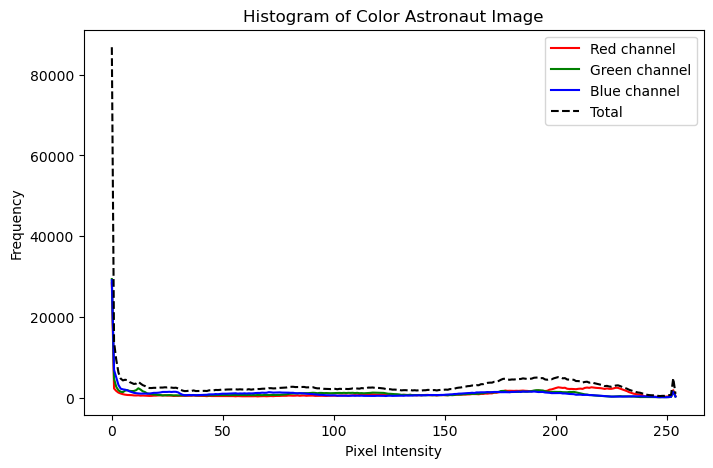

In [111]:
#solution

# Load the astronaut image
color_image = data.astronaut()

# Display the color image
plt.imshow(color_image)
plt.axis('off')
plt.show()

# Compute histogram for each channel
colors = ('red', 'green', 'blue')
channel_labels = ('Red', 'Green', 'Blue')
plt.figure(figsize=(8, 5))

# Plot histogram for each channel
for i, color in enumerate(colors):
    hist, bins = np.histogram(color_image[..., i], bins=256, range=(0, 255))
    plt.plot(bins[:-1], hist, color=color, label=f'{channel_labels[i]} channel')

# Plot total histogram (all channels flattened)
hist_total, bins_total = np.histogram(color_image, bins=256, range=(0, 255))
plt.plot(bins_total[:-1], hist_total, color='black', linestyle='--', label='Total')

plt.title("Histogram of Color Astronaut Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



Text(0, 0.5, 'Frequency')

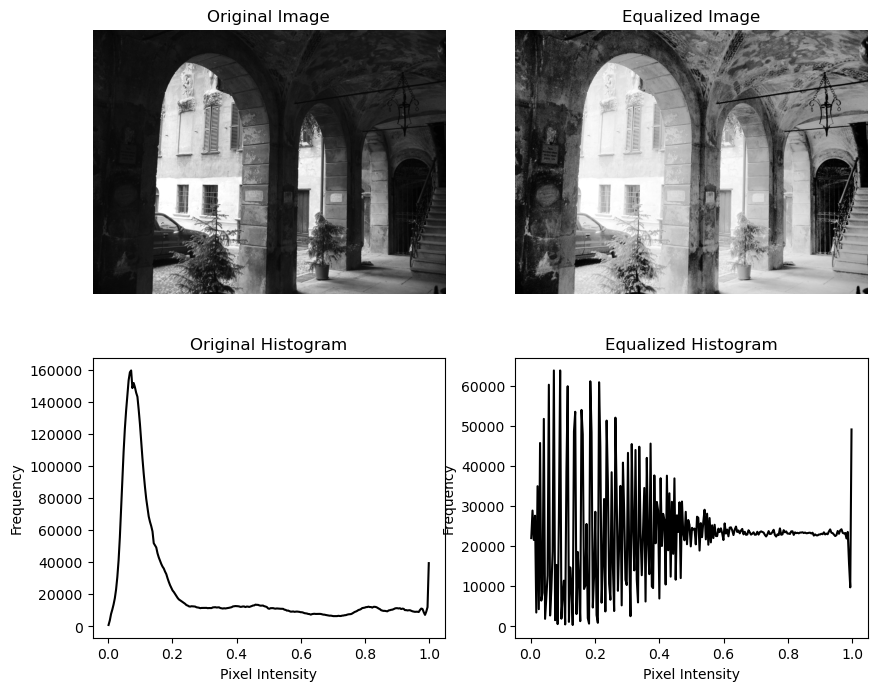

In [114]:
# solution
from skimage import io, color

# Read the image
img = io.imread('images/aquatermi_lowcontrast.jpg')
if img.ndim == 3:
    img_gray = color.rgb2gray(img)
else:
    img_gray = img / 255.0

# Histogram of original image
hist_orig, bins_orig = exposure.histogram(img_gray)

# Histogram equalization
img_eq = exposure.equalize_hist(img_gray)
hist_eq, bins_eq = exposure.histogram(img_eq)

# Plot
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].imshow(img_gray, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(img_eq, cmap='gray')
axs[0, 1].set_title('Equalized Image')
axs[0, 1].axis('off')

axs[1, 0].plot(bins_orig, hist_orig, color='black')
axs[1, 0].set_title('Original Histogram')
axs[1, 0].set_xlabel('Pixel Intensity')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].plot(bins_eq, hist_eq, color='black')
axs[1, 1].set_title('Equalized Histogram')
axs[1, 1].set_xlabel('Pixel Intensity')
axs[1, 1].set_ylabel('Frequency')





*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

Histogram equalization (using CDF and interpolation) redistributes pixel values so that the histogram is more uniform, enhancing global contrast, especially in images with backgrounds and foregrounds that are both bright or both dark.

Linear contrast stretch simply rescales the pixel values linearly between the minimum and maximum values, but it does not change the shape of the histogram or redistribute pixel intensities as histogram equalization does.

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



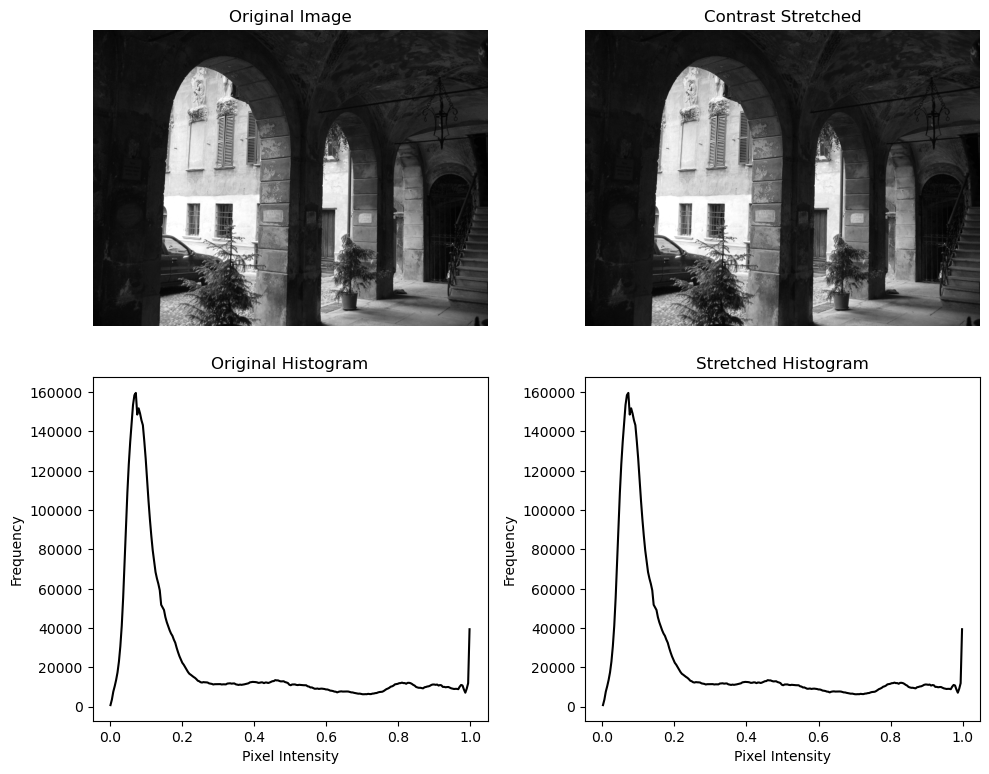

In [123]:
# solution
# solution

def linear_contrast_stretch(img, bins=256):
    # Stretch pixel values to [0, 1]
    img_min = img.min()
    img_max = img.max()
    if img_max == img_min:
        return img.copy()
    stretched = (img - img_min) / (img_max - img_min)
    return stretched

# Read the low contrast image and convert to grayscale
img = io.imread('images/aquatermi_lowcontrast.jpg')
if img.ndim == 3:
    img_gray = color.rgb2gray(img)
else:
    img_gray = img / 255.0

# Apply linear contrast stretch
img_stretched = linear_contrast_stretch(img_gray)

# Plot original and stretched images and their histograms
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].imshow(img_gray, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(img_stretched, cmap='gray')
axs[0, 1].set_title('Contrast Stretched')
axs[0, 1].axis('off')

hist_orig, bins_orig = exposure.histogram(img_gray)
hist_stretch, bins_stretch = exposure.histogram(img_stretched)

axs[1, 0].plot(bins_orig, hist_orig, color='black')
axs[1, 0].set_title('Original Histogram')
axs[1, 0].set_xlabel('Pixel Intensity')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].plot(bins_stretch, hist_stretch, color='black')
axs[1, 1].set_title('Stretched Histogram')
axs[1, 1].set_xlabel('Pixel Intensity')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




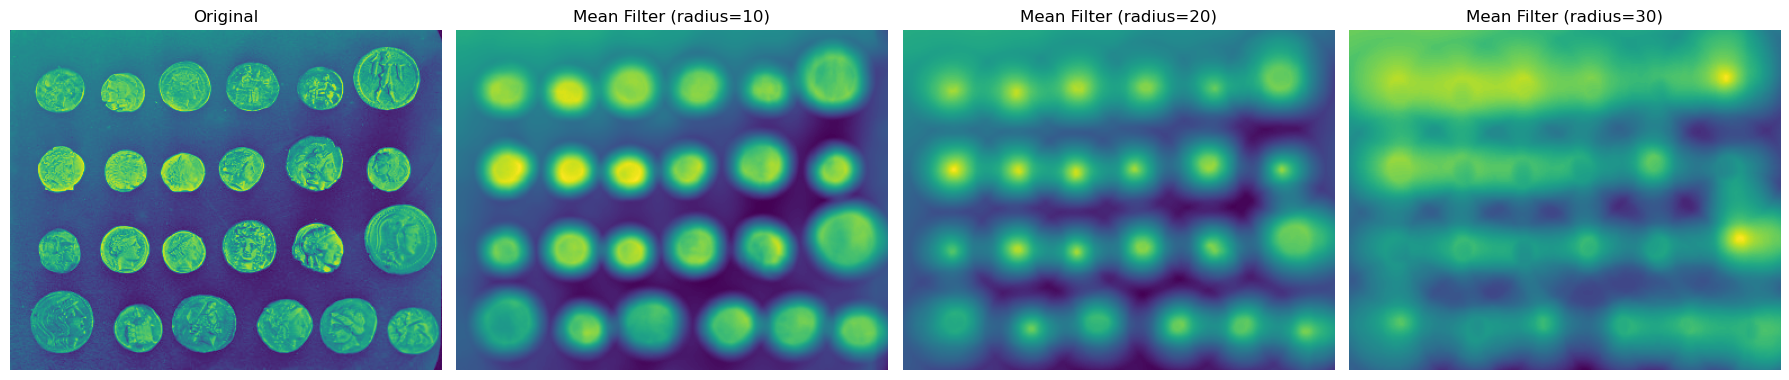

In [130]:
# solution

from skimage import filters, morphology

#Load the coins image
coins = data.coins()

# Define structuring elements (disk) with different radii
selem_20 = morphology.disk(20)
selem_30 = morphology.disk(30)
selem_10 = morphology.disk(10)

# Apply mean filter with different radii
mean_20 = filters.rank.mean(coins, selem_20)
mean_30 = filters.rank.mean(coins, selem_30)
mean_10 = filters.rank.mean(coins, selem_10)

# Plot original and filtered images
fig, axs = plt.subplots(1, 4, figsize=(18, 6))
axs[0].imshow(coins)
axs[0].set_title('Original')
axs[0].axis('off')

axs[1].imshow(mean_10)
axs[1].set_title('Mean Filter (radius=10)')
axs[1].axis('off')

axs[2].imshow(mean_20)
axs[2].set_title('Mean Filter (radius=20)')
axs[2].axis('off')

axs[3].imshow(mean_30)
axs[3].set_title('Mean Filter (radius=30)')
axs[3].axis('off')

plt.tight_layout()
plt.show()

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

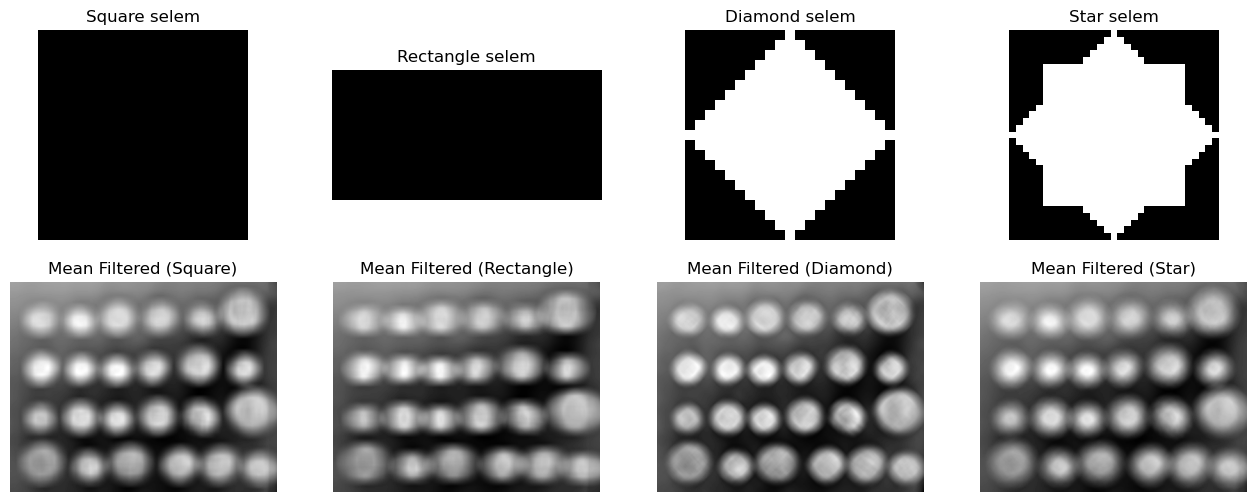

In [134]:
# solution

# Define different structuring elements
selems = [
    ("Square", morphology.square(21)),
    ("Rectangle", morphology.rectangle(15, 31)),
    ("Diamond", morphology.diamond(10)),
    ("Star", morphology.star(10))
]

n = len(selems)
fig, axs = plt.subplots(2, n, figsize=(4*n, 6))

for i, (name, selem) in enumerate(selems):
    # Show the structuring element
    axs[0, i].imshow(selem, cmap='gray')
    axs[0, i].set_title(f"{name} selem")
    axs[0, i].axis('off')
    # Apply mean filter
    filtered = filters.rank.mean(coins, selem)
    axs[1, i].imshow(filtered, cmap='gray')
    axs[1, i].set_title(f"Mean Filtered ({name})")
    axs[1, i].axis('off')


*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

Increasing the disk radius makes the image smoother and blurs more details. A smaller radius preserves more details.

...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

Different structuring elements affect the smoothing pattern:  
- Square and rectangle produce blocky, directional smoothing.  
- Diamond and star create more rounded or patterned smoothing.  
The shape of the selem influences how edges and details are blurred in the filtered image.




*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

**Mean filter** averages all pixels in the neighborhood equally, causing uniform smoothing and possible loss of edges.  
**Gaussian filter** gives more weight to central pixels, preserving edges better and producing less blurring.
